# Case study on Supervised learning

### Iris Dataset:
The Iris Dataset contains four features (length and width of sepals and petals) of a total of 150 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor).

Keywords used in data:
- SW : Sepal Width
- SL : Sepal Length
- PW : Petal Width
- PL : Petal Lenght

Do the following in the iris dataset.
1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

## 1. Read the dataset to the python environment

In [2]:
df=pd.read_excel('iris.xls')
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
df['Classification'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Classification, dtype: int64

**Findings:**
* While reading the data set, we can see that there are **5 features and 150 samples.**
* In SL,SW,PL features, there are 7,6 & 6 null/ missing values are present respectively.
* Except Classification feature (which is object type) all others are of float64 data type.
* It contain 3 Classifications: Iris-versicolor, Iris-virginica, Iris-setosa

## 2. Do necessary pre-processing steps.

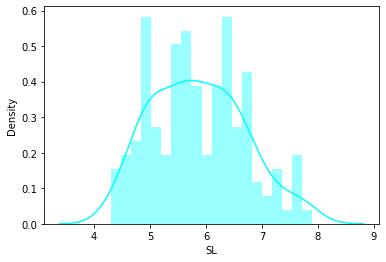

In [6]:
# First we want to address the missing values

sns.distplot(df['SL'],kde=True,bins=20,color='cyan')
plt.show()

<AxesSubplot:xlabel='SW', ylabel='Density'>

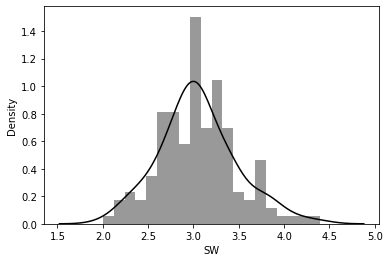

In [7]:
sns.distplot(df['SW'],color='black',bins=20)

<AxesSubplot:xlabel='PL', ylabel='Density'>

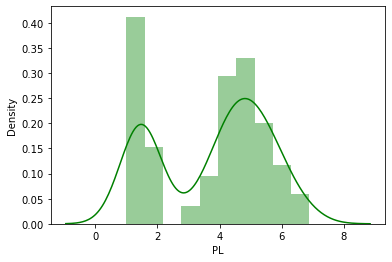

In [8]:
sns.distplot(df['PL'],color='green',bins=10)

In [9]:
#from the distribution plot it is clear that SW is normally distributed, so we can use mean
# And the other two can be filled with median

df['SL'] = df['SL'].fillna(df.groupby('Classification')['SL'].transform('median'))
# another method : df['SL']=df.groupby('Classification')['SL'].apply(lambda x:x.fillna(x.median()))

df['SW'] = df['SW'].fillna(df.groupby('Classification')['SW'].transform('mean'))
# another method : df['SW']=df.groupby('Classification')['SW'].apply(lambda x:x.fillna(x.median()))

df['PL'] = df['PL'].fillna(df.groupby('Classification')['PL'].transform('median'))
# another method : df['PL']=df.groupby('Classification')['PL'].apply(lambda x:x.fillna(x.median()))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [48]:
x=df.drop(['Classification'],axis=1) #Splitting the data set into target and features
y=pd.DataFrame(df['Classification'])

In [11]:
# Classification feature (target) is object type. we want to convert it into numerical
# Since it is the target column, so inorder to avoid multiple column we can perform label enconding.

from sklearn.preprocessing import LabelEncoder

label_en=LabelEncoder()
a=['Classification']

for i in np.arange(len(a)): # we are doing labelling for each entries of Classification
    y[a[i]]=label_en.fit_transform(y[a[i]])

In [12]:
y

,Classification
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [13]:
x

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.0,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,5.55,2.0
148,6.2,3.4,5.40,2.3


## 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [14]:
from sklearn.model_selection import train_test_split

# Spliting the dataset for training and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)


## Model 1: Logisitic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

log_model=LogisticRegression()
log_model.fit(x_train,y_train)
y_pred=log_model.predict(x_test)

In [28]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report,precision_score,recall_score

accuracy_score(y_test,y_pred)

1.0

In [31]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 1.0
Precision score is: 1.0
Recall score is: 1.0
f1 score is: 1.0


In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## Model 2: k-NN

In [49]:
from sklearn.neighbors import KNeighborsClassifier as knn

# next step is to find optimum k value
# so we want to create model for varied k value inorder to get accuracy of each k value.
# then proceed with model building with k value of higher accuracy

acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=knn(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)
    

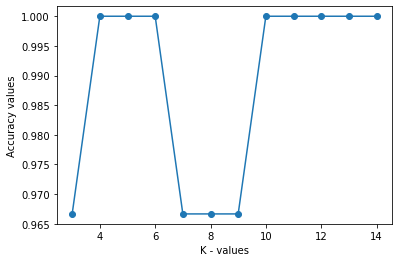

In [50]:
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() # here we can high accuracy values are for k=4,5,6,10,11,11,13,14, so we can go with one of them

In [51]:
#we can build a model with k-value=4

classifier=knn(n_neighbors=4,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [52]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 1.0
Precision score is: 1.0
Recall score is: 1.0
f1 score is: 1.0


In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [54]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## Model 3: SVM
### Model 3.1: Linear SVM

In [56]:
from sklearn.svm import SVC

svm_linear=SVC(kernel='linear')

svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [57]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 1.0
Precision score is: 1.0
Recall score is: 1.0
f1 score is: 1.0


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [59]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

### Model 3.2: Polynomial SVM

In [61]:
svm_linear=SVC(kernel='poly')

svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [62]:
print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 0.9666666666666667
Precision score is: 0.9694444444444444
Recall score is: 0.9666666666666667
f1 score is: 0.9664109121909632


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [64]:
confusion_matrix(y_test,y_pred) # 1 miss classification present in this model

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

### Model 3.3: Radial Basis Function SVM

In [65]:
svm_linear=SVC(kernel='rbf')

svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))

Accuracy score is: 1.0
Precision score is: 1.0
Recall score is: 1.0
f1 score is: 1.0


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [67]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## Model 4. Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))

Accuracy score is: 1.0
Precision score is: 1.0
Recall score is: 1.0
f1 score is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [69]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

## Model 5. Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print('Accuracy score is:',accuracy_score(y_test,y_pred))
print('Precision score is:',precision_score(y_test,y_pred,average='weighted'))
print('Recall score is:',recall_score(y_test,y_pred,average='weighted'))
print('f1 score is:',f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))

Accuracy score is: 1.0
Precision score is: 1.0
Recall score is: 1.0
f1 score is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [71]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)